# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

1. **Предобработать данные**:

- Обнаружить и обработать пропущенные значения. 
- Убрать неявные дубликаты. Привести к единному виду уникальные значения.


2. **Выявить причины пропусков в данных.**


  
3. **Обработать аномалии.**  

  
4. **Вычислить и добавить новые параметры.**


5. **Провести исследовательский анализ данных**:
- Построить гистограммы. Сделать выводы.
- Проанализировать время продажи квартиры.
- Определить основные факторы, влияющие на стоимость объекта.


4. **Провести анализ стоимости квадратного метра**: 
- Просчитать среднюю цену квадратного метра в 10 населенных пунктах с наибольшим числом объявлений
- В Санкт-Петербурге исследовать зависимость стоимости квартир от расстояния до центра города.


5. **Сделать выводы по проделанной работе.**   
 

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Неверный тип данных:  
- first_day_exposition(**object**) заменить на type **date**
- floors_total(**float64**) заменить на **int64**
- is_apartment(**object**) заменить на **bool**
- balcony(**float64**) заменить на **int64**
- parks_around3000(**float64**) заменить на **int64**
- ponds_around3000(**float64**) заменить на **int64**
- days_exposition(**float64**) заменить на **int64**

In [3]:
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

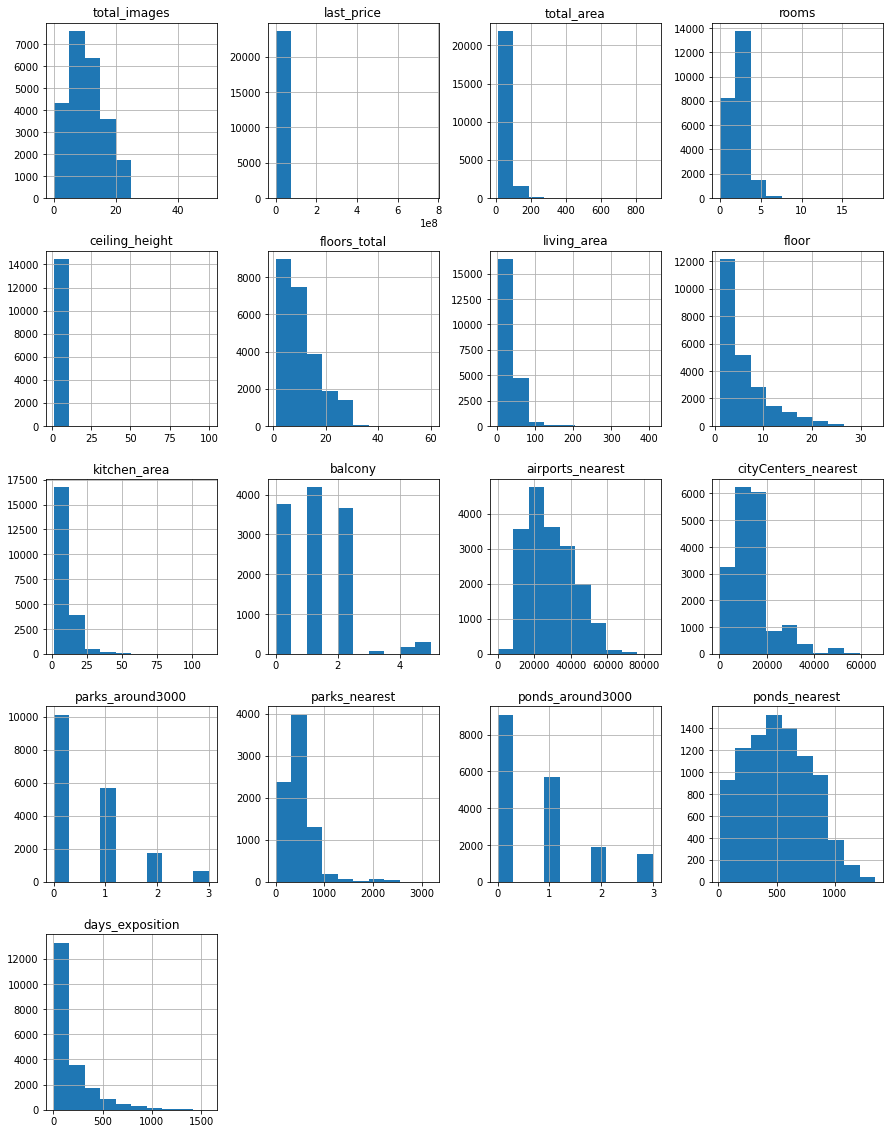

In [4]:
df.hist(figsize=(15,20))

Гистограммы демонстрируют данные по каждому параметру, что позволяет получить полную картину по дальнейшей работе с каждым из них: выявить аномалии и ошибки, которые необходимо обработать, а также сделать частные выводы.

### Выполните предобработку данных

In [5]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [6]:
#переименнуем столбец для общего удобства
df.rename(columns={'cityCenters_nearest':'city_centers_nearest'}, inplace=True)

In [7]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Логические замены можно предложить в столбцах**  :        
- ceiling_height(высота потолков)  -  взяв медианное значение. Данные должны предоставляться продавцом.     
- is_apartment(апартаменты)  -  пропущенные значения можно заменить на 0. Данные должны предоставляться продавцом.    
- balcony(кол-во балконов)  -  пропущенные значения можно заменить на 0. Данные должны предоставляться продавцом.    
- city_centers_nearest(расстояние до центра города)  -  заменить на медиану. Данные должны определяться автоматически.  

In [8]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

df['is_apartment'] = df['is_apartment'].fillna(False).astype('bool')

df['balcony'] = df['balcony'].fillna(0).astype('int')

df['city_centers_nearest'] = df['city_centers_nearest'].fillna(df['city_centers_nearest'].median())

df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')

Привел столбцы к верному типу.

In [9]:
# код ревьюера
import datetime as dt

df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['first_day_year'] = df['first_day_exposition'].dt.year
df[df['days_exposition'].isnull()].pivot_table(columns = 'first_day_year', values = 'total_area', aggfunc = 'count')

first_day_year,2014,2015,2016,2017,2018,2019
total_area,18,70,67,271,959,1796


In [10]:
df.dropna(subset=['floors_total'], inplace=True)
df['floors_total'] = df['floors_total'].astype('int')

In [11]:
df.dropna(subset=['locality_name'], inplace=True)

In [12]:
ratio_living= df['total_area'].median()/df['living_area'].median()
ratio_kitchen = df['total_area'].median()/df['kitchen_area'].median()

df['living_area'].fillna(df['total_area']/ratio_living, inplace=True)
df['kitchen_area'].fillna(df['total_area']/ratio_kitchen, inplace=True)


In [13]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest        0
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
first_day_year              0
dtype: int64

*Заменили пропуски и изменили тип данных, где это было возможно.  
Строки с пропусками в столбцах locality_name можно удалить, т.к только 49 строк из 23699 имеют пропуск.  
**Потенциальное решение проблемы наличия пропусков в столбцах kitchen_area и living_area:**    
Чтобы заполнить пропуски в данных столбцах, мы можем взять среднее/точное значение, обратившись к информации о площади аналогичных квартир в рассматриваемом доме. Однако для этого требуется больше данных.*

In [14]:
df['locality_name'] = (
    df['locality_name']
    .str.replace('ё', 'е')
    .str.replace('a', 'а')
    .replace(['городской ', ' городского типа','коттеджный поселок '], '', regex = True )
    .replace(['-1'], '', regex = True )
    .replace(['село ','садовое товарищество '], 'поселок ', regex = True )
    .replace(['поселок Мурино'], 'Мурино', regex = True)
    .replace(['деревня Кудрово'], 'Кудрово', regex = True)
    .replace(['поселок  Лесное'], 'Лесное', regex = True)
    .replace([' при железнодорожной станции ',' станции '], ' ', regex = True )
    .replace(['поселок Любань'], 'Любань', regex = True)
    .replace(['Никольское'], 'поселок Никольский', regex = True)
    .replace(['поселок поселок Никольский'], 'поселок Никольский', regex = True)
    .replace(['поселок Лесное'], 'Лесное', regex = True)
    
    

)
    
    
    
    
    
    
    


In [15]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кивеннапа Север', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино',
       'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово', 'Лесное',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Счастье', 'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнов

In [16]:
# создаем цикл для проверки неявных дубликатов
pet_list = []
unique_loc = df['locality_name'].str.lower().unique()

for i in unique_loc:
    if 'лесное' in i:  
        pet_list.append(i)
display(pet_list)

['лесное']

In [17]:
similar_elements = []
# Функция для проверки схожести строк
def similar(str1, str2):
    return str1 in str2 or str2 in str1

# Цикл для нахождения схожести в списке
for item1 in df['locality_name'].str.lower().unique():
    for item2 in df['locality_name'].str.lower().unique():
        if item1 != item2 and similar(item1, item2):
            similar_elements.append(item1)
display(similar_elements)

['коммунар',
 'кингисепп',
 'деревня старая',
 'луга',
 'поселок усть-луга',
 'поселок русско-высоцкое',
 'поселок кингисеппский',
 'деревня старая пустошь',
 'поселок коммунары',
 'деревня бор',
 'поселок свирь',
 'высоцк',
 'поселок свирьстрой',
 'деревня борисова грива']

In [18]:
len(df['locality_name'].unique())

310

**До обработки уникальный значений было 365, после обработки 310.**

**Выявление и удаление аномальных значений(выбросов)**

In [19]:
len(df)

23565

In [20]:
df['ceiling_height'].describe()

count    23565.000000
mean         2.724530
std          0.991026
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [21]:
#потолки менее 2м в высоту определенно являются ошибкой
df.loc[df['ceiling_height'] < 2 ,'ceiling_height'] = 2

In [22]:
def remove_anomaly(df, column, percentage=0.1):

    # Вычисляем квартильные значения
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Определяем границы для выбросов
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Выявляем выбросы
    anomaly = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Удаляем указанный процент самых больших выбросов
    num_anomaly_to_remove = int(percentage * len(anomaly))
    anomaly_sorted = anomaly.sort_values(by=column, ascending=False)
    anomaly_to_remove = anomaly_sorted.head(num_anomaly_to_remove)

    
    df.drop(anomaly_to_remove.index, inplace=True)


    

In [23]:
remove_anomaly(df,'rooms',percentage=0.1)
remove_anomaly(df,'total_area',percentage=0.1)
remove_anomaly(df,'last_price',percentage=0.1)
remove_anomaly(df,'ceiling_height',percentage=0.1)
remove_anomaly(df,'kitchen_area',percentage=0.1)
remove_anomaly(df,'parks_nearest',percentage=0.1)
remove_anomaly(df,'city_centers_nearest',percentage=0.1)
remove_anomaly(df,'floors_total',percentage=0.1)
remove_anomaly(df,'living_area',percentage=0.1)

In [24]:
df['ceiling_height'].describe()

count    22333.000000
mean         2.677720
std          0.168553
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.500000
Name: ceiling_height, dtype: float64

In [25]:
len(df)

22333

### Добавьте в таблицу новые столбцы

In [26]:
#цена одного кв.метра
df['cost_per_metr'] = (df['last_price']/df['total_area']).round(2)
#день публикации объявления
df['day_publish'] = df['first_day_exposition'].dt.weekday
#месяц публикации объявления
df['month_publish'] = df['first_day_exposition'].dt.month
#год публикации объявления
df['year_publish'] = df['first_day_exposition'].dt.year
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_day_year,cost_per_metr,day_publish,month_publish,year_publish
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1.0,482.0,2.0,755.0,NaN,2019,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0.0,NaN,0.0,NaN,81.0,2018,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,1.0,90.0,2.0,574.0,558.0,2015,92785.71,3,8,2015
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,NaN,NaN,NaN,NaN,55.0,2018,95065.79,0,9,2018
6,6,3700000.0,37.3,2017-11-02,1,2.65,26,10.6,6,False,...,0.0,NaN,0.0,NaN,155.0,2017,99195.71,3,11,2017


In [27]:
#функция для категоризации по этажам
def floor_type(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
    

In [28]:
df['floor_type'] = df.apply(floor_type, axis=1)
df.head(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_day_year,cost_per_metr,day_publish,month_publish,year_publish,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,482.0,2.0,755.0,NaN,2019,120370.37,3,3,2019,другой


In [29]:
df['city_center_km'] = (df['city_centers_nearest']/1000).round(0)
df.head(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,first_day_year,cost_per_metr,day_publish,month_publish,year_publish,floor_type,city_center_km
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,2.0,755.0,NaN,2019,120370.37,3,3,2019,другой,16.0


### Проведите исследовательский анализ данных

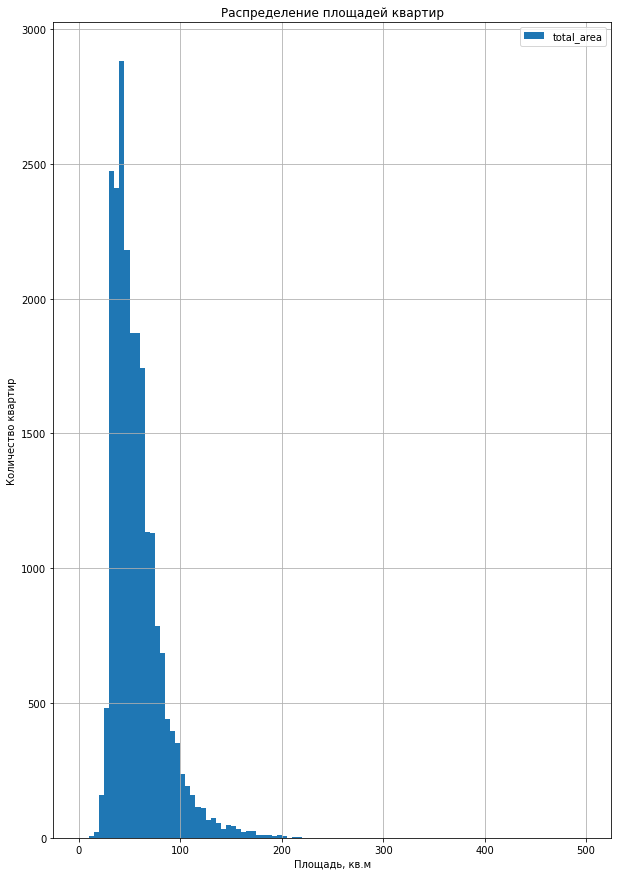

count    22333.000000
mean        56.854191
std         24.578421
min         12.000000
25%         40.000000
50%         51.000000
75%         67.300000
max        240.000000
Name: total_area, dtype: float64

In [30]:
df.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (10,15), range = (0,500))
plt.title('Распределение площадей квартир')
plt.xlabel('Площадь, кв.м')
plt.ylabel('Количество квартир')
plt.show()
df['total_area'].describe()

Вывод:  
Большинство квартир имеют площадь до 67 кв.м. Среднее значение (56.85 кв.м) и медиана (51 кв.м) указывают на то, что распределение площадей квартир довольно равномерное, с небольшим перекосом в сторону больших значений. Стандартное отклонение (24.57 кв.м) свидетельствует о значительном разбросе значений, а максимальное значение (240 кв.м) показывает наличие нескольких квартир с очень большой площадью.

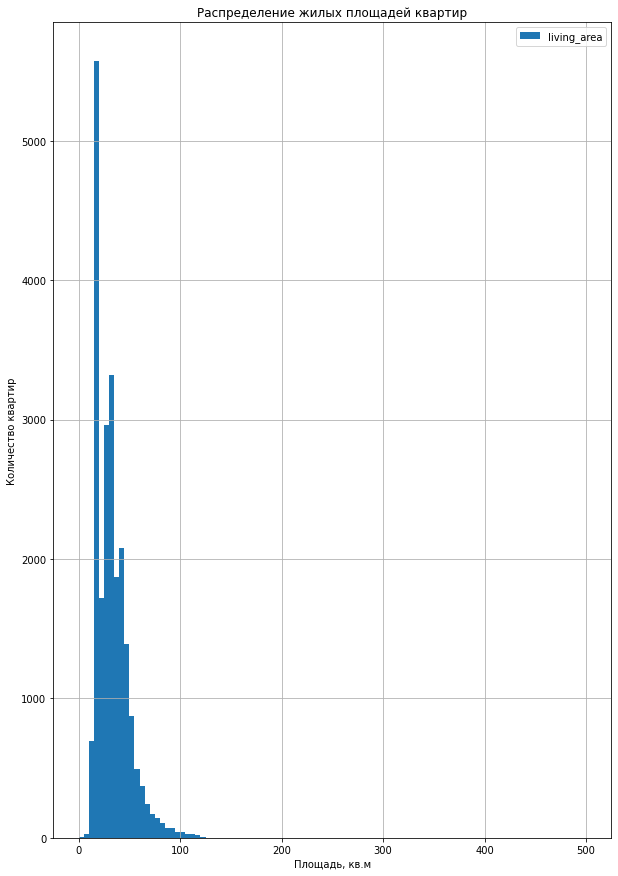

count    22333.000000
mean        32.595397
std         16.123628
min          2.000000
25%         18.800000
50%         30.000000
75%         41.300000
max        123.900000
Name: living_area, dtype: float64

In [31]:
df.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (10,15), range = (0,500))
plt.title('Распределение жилых площадей квартир')
plt.xlabel('Площадь, кв.м')
plt.ylabel('Количество квартир')
plt.show()
df['living_area'].describe()

Вывод:  
Большинство квартир имеют жилую площадь от 18.80 кв.м до 41.30 кв.м. Среднее значение (32.59 кв.м) и медиана (30.00 кв.м) указывают на то, что распределение жилой площади имеет небольшое смещение вправо. Значительное стандартное отклонение (16.12 кв.м) свидетельствует о широком разбросе значений.

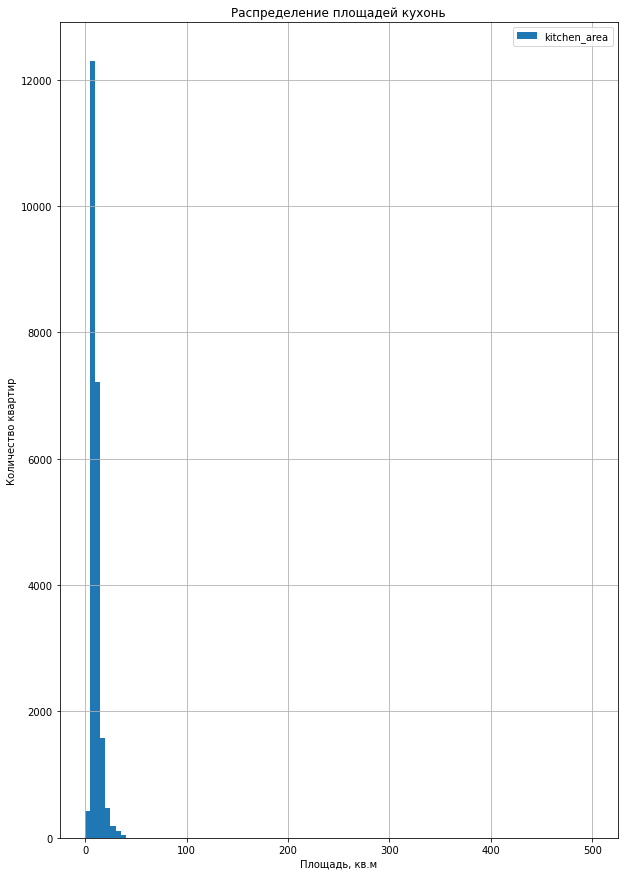

count    22333.000000
mean         9.983385
std          4.365844
min          1.300000
25%          7.000000
50%          9.000000
75%         11.500000
max         36.400000
Name: kitchen_area, dtype: float64

In [32]:
df.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (10,15), range = (0,500))
plt.title('Распределение площадей кухонь')
plt.xlabel('Площадь, кв.м')
plt.ylabel('Количество квартир')
plt.show()
df['kitchen_area'].describe()

Вывод:  
Большинство квартир имеют кухню площадью до 11.5 кв.м. Среднее значение (9.98 кв.м) и медиана (9 кв.м) указывают на то, что площади кухонь имеют распределение с небольшим сдвигом в сторону больших значений. Стандартное отклонение (4.36 кв.м) свидетельствует о значительном разбросе значений, а минимальное значение в 1 кв.м и максимальное значение в 36.4 кв.м могут отражать необычные случаи в данных. 

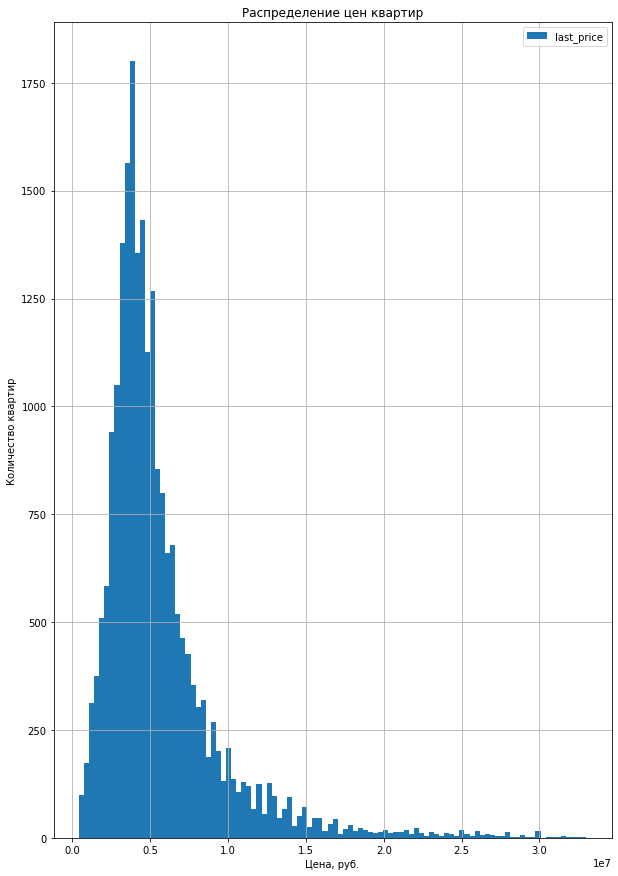

count    2.233300e+04
mean     5.588305e+06
std      3.807031e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.575000e+06
75%      6.500000e+06
max      3.300000e+07
Name: last_price, dtype: float64

In [33]:
df.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, figsize = (10,15))
plt.title('Распределение цен квартир')
plt.xlabel('Цена, руб.')
plt.ylabel('Количество квартир')
plt.show()
df['last_price'].describe()

Вывод:  
Большинство квартир имеют цену до 6,500,000 рублей. Среднее значение (5,588,305 рублей) и медиана (4,575,000 рублей) указывают на то, что цены на квартиры имеют распределение с длинным хвостом вправо. Стандартное отклонение (3,807,031 рублей) свидетельствует о значительном разбросе значений

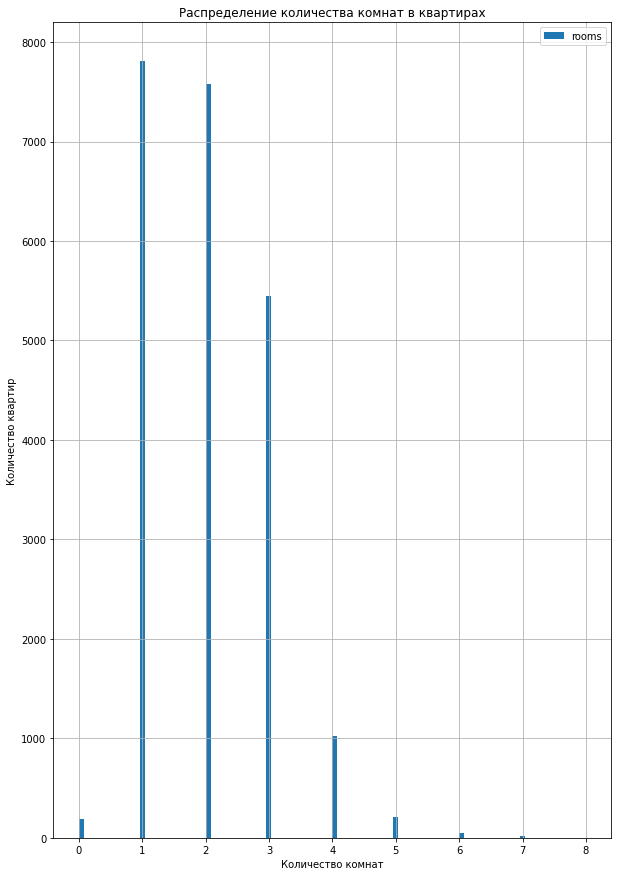

count    22333.000000
mean         2.009717
std          0.973932
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

In [34]:
df.plot(y = 'rooms', kind = 'hist', bins = 100, grid=True, figsize = (10,15))
plt.title('Распределение количества комнат в квартирах')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
df['rooms'].describe()

Вывод:  
Большинство квартир имеют от 1 до 3 комнат. Среднее значение (2.009) и медиана (2) указывают на то, что распределение количества комнат в квартирах близко к нормальному. Умеренное стандартное отклонение (0.97) свидетельствует о незначительном разнообразии значений, а минимальное значение в 0 комнат можно интерпретировать как квартиру-студию.

count    22333.000000
mean         2.677720
std          0.168553
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.500000
Name: ceiling_height, dtype: float64

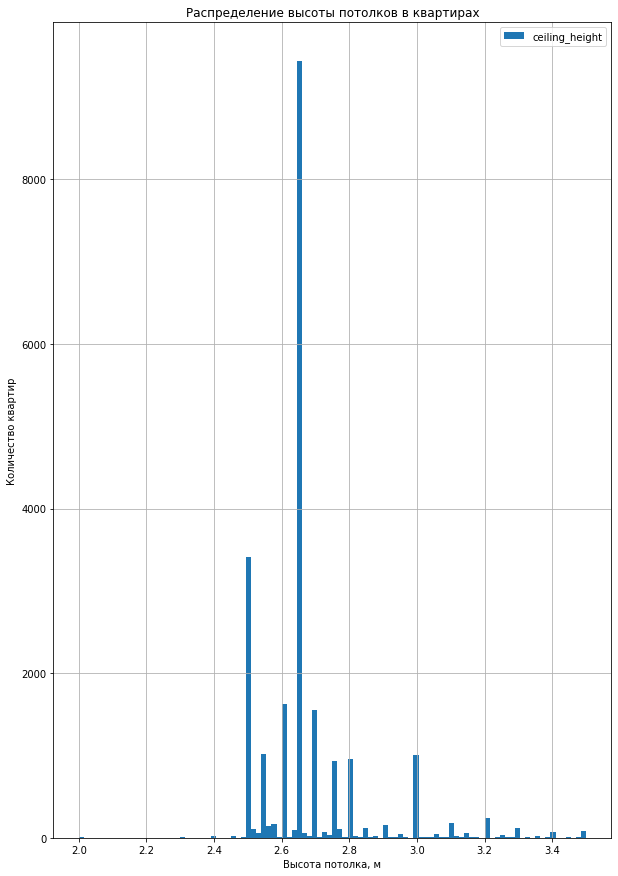

In [35]:
df.plot(y = 'ceiling_height', kind = 'hist', bins = 100, grid=True, figsize = (10,15))
plt.title('Распределение высоты потолков в квартирах')
plt.xlabel('Высота потолка, м')
plt.ylabel('Количество квартир')
df['ceiling_height'].describe()

Вывод:  
Большинство квартир имеют высоту потолков от 2.5 до 3.0 метров. Средняя высота (2.67 метра) и медиана (2.65 метра) указывают на то, что распределение высот потолков в квартирах близко к нормальному. Небольшое стандартное отклонение (0.16 метра).

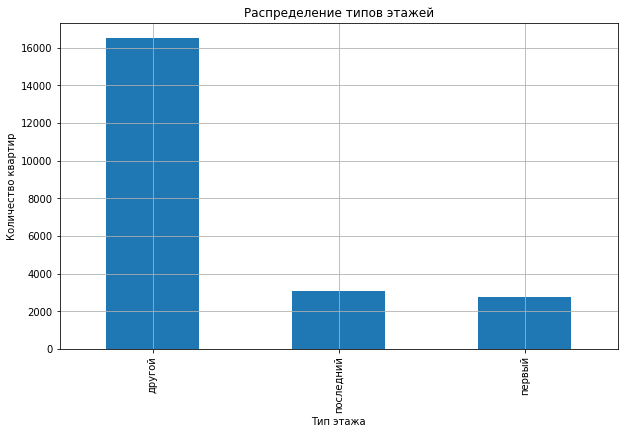

другой       16498
последний     3064
первый        2771
Name: floor_type, dtype: int64

In [36]:
df['floor_type'].value_counts().plot(kind='bar', grid=True, figsize=(10, 6))
plt.title('Распределение типов этажей')
plt.xlabel('Тип этажа')
plt.ylabel('Количество квартир')
plt.show()
df['floor_type'].value_counts()


Вывод:  
Большая часть квартир расположена на этажах типа "другой". Последние этажи встречаются чуть чаще, чем первые.

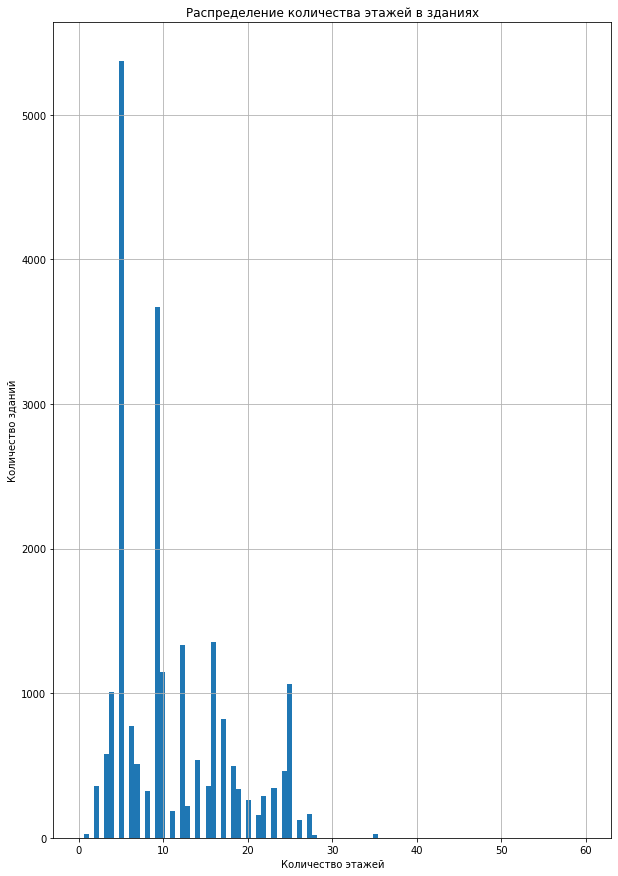

count    22333.000000
mean        10.893745
std          6.621651
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

In [37]:
df['floors_total'].hist(bins=100, grid=True, figsize=(10, 15), range=(0, 60))
plt.title('Распределение количества этажей в зданиях')
plt.xlabel('Количество этажей')
plt.ylabel('Количество зданий')
plt.show()
df['floors_total'].describe()

Вывод:  
Большинство зданий имеют от 5 до 16 этажей. Среднее значение (10.89) и медиана (9) указывают на то, что распределение количества этажей в зданиях имеет небольшое смещение вправо. Значительное стандартное отклонение (6.62) свидетельствует о широком разбросе значений

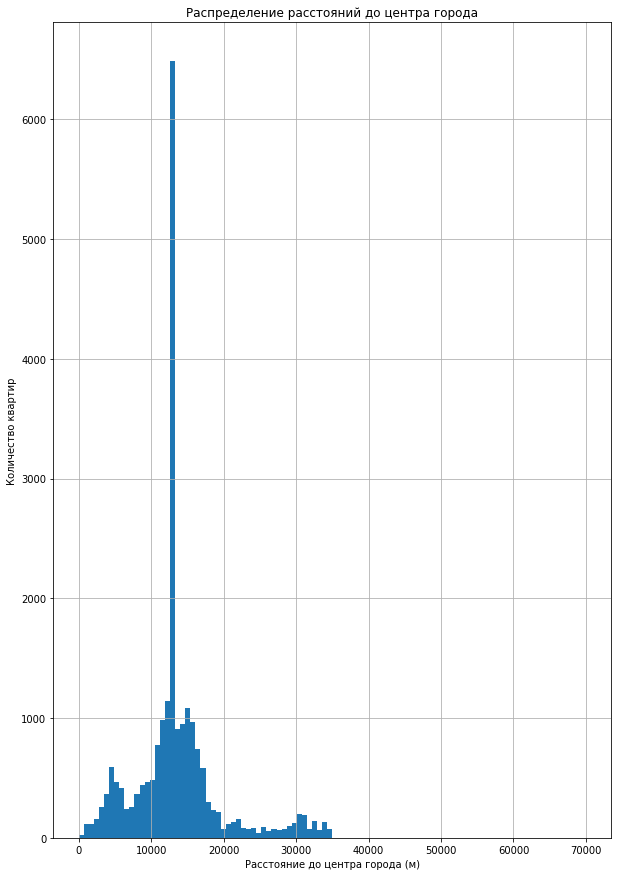

count    22333.000000
mean     13579.317624
std       6035.659851
min        181.000000
25%      11228.000000
50%      13098.500000
75%      15131.000000
max      34928.000000
Name: city_centers_nearest, dtype: float64

In [38]:
df['city_centers_nearest'].hist(bins=100, grid=True, figsize=(10, 15), range=(0, 70000))
plt.title('Распределение расстояний до центра города')
plt.xlabel('Расстояние до центра города (м)')
plt.ylabel('Количество квартир')
plt.show()
df['city_centers_nearest'].describe()

Вывод:  
Большинство квартир находятся на расстоянии от 11.22 до 15.1 км от центра города. Среднее значение (13,579.31 метров) и медиана (13,098.5 метров) указывают на то, что распределение расстояний имеет небольшое смещение вправо. Значительное стандартное отклонение (6,035.65 метров) свидетельствует о широком разбросе значений.

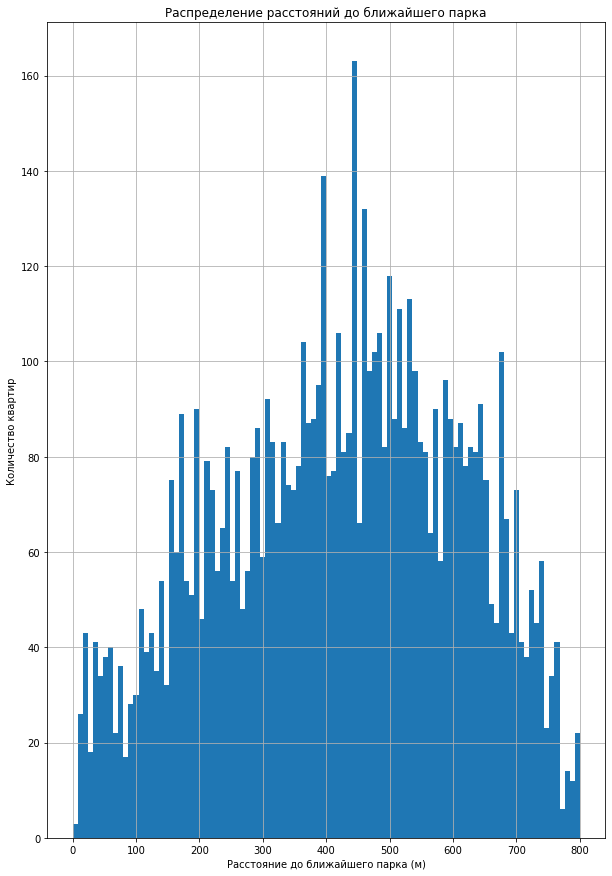

count    7312.000000
mean      488.271882
std       314.221493
min         1.000000
25%       293.000000
50%       456.000000
75%       615.000000
max      2409.000000
Name: parks_nearest, dtype: float64

In [39]:
df['parks_nearest'].hist(bins=100, grid=True, figsize=(10, 15), range=(0, 800))
plt.title('Распределение расстояний до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка (м)')
plt.ylabel('Количество квартир')
plt.show()
df['parks_nearest'].describe()

Вывод:  
Большинство квартир находятся на расстоянии 488 метров от ближайшего парка. Среднее значение (488.27 метров) и медиана (456 метров) указывают на то, что распределение расстояний до парка симметрично.

**Время продажи квартиры**

In [55]:
df['days_exposition'].describe()

count    19414.000000
mean       177.126713
std        215.768585
min          1.000000
25%         44.000000
50%         93.000000
75%        225.000000
max       1580.000000
Name: days_exposition, dtype: float64

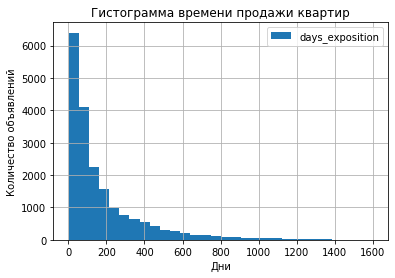

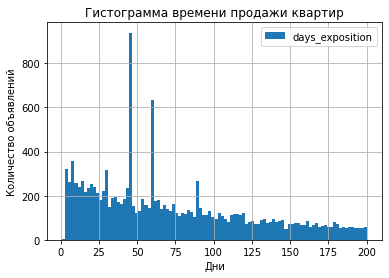

In [56]:
df.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
plt.title('Гистограмма времени продажи квартир')
plt.xlabel('Дни')
plt.ylabel('Количество объявлений')
plt.show()

df.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))
plt.title('Гистограмма времени продажи квартир')
plt.xlabel('Дни')
plt.ylabel('Количество объявлений')
plt.show()


Вывод:  
    Обычно продажа квартиры занимает 93 дня. Среднее время продажи 177.12 дней.  
    Быстрые продажи происходят быстрее 44 дней, а долгие дольше 225 дней.

**Факторы которые больше всего влияют на общую (полную) стоимость объекта**

<AxesSubplot:xlabel='total_area'>

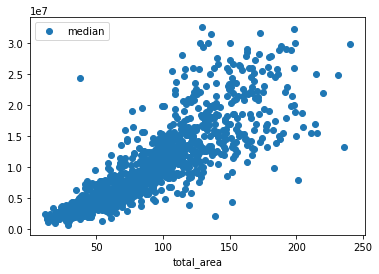

In [43]:
pivot_total_area = df.pivot_table(index='total_area',values='last_price',aggfunc = ['mean','median'])
pivot_total_area.columns = ['mean','median']
pivot_total_area.plot(y='median',style ='o')



In [44]:
df['last_price'].corr(df['total_area'])

0.7793309146689889

Коэфициент корреляции Пирсона составляет 0.779 - зависимость сильная.  
Чем больше общая площадь квартиры, тем выше ее стоимость.

0.6781408890747059

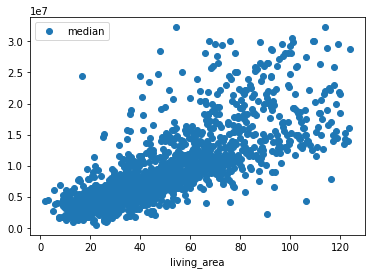

In [45]:
pivot_living = df.pivot_table(index='living_area',values='last_price',aggfunc = ['mean','median'])
pivot_living.columns = ['mean','median']
pivot_living.plot(y='median',style ='o')
df['last_price'].corr(df['living_area'])


Коэфициент корреляции 0.678.  
Чем больше жилая площадь квартиры, тем выше ее стоимость.

0.6009421331370995

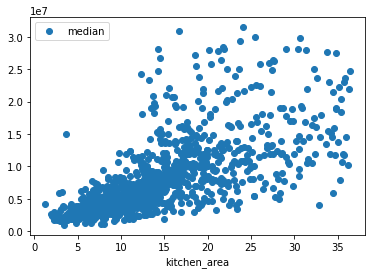

In [46]:
pivot_total_kitchen = df.pivot_table(index='kitchen_area',values='last_price',aggfunc = ['mean','median'])
pivot_total_kitchen.columns = ['mean','median']
pivot_total_kitchen.plot(y='median',style ='o')
df['last_price'].corr(df['kitchen_area'])

Корреляция в 0.6 говорит о наличии связи.  
Чем больше площадь кухни, тем выше стоимость квартиры.

0.4901171627649389

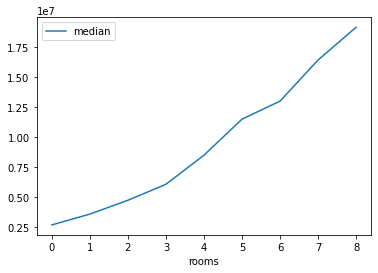

In [47]:
pivot_total_rooms = df.pivot_table(index='rooms',values='last_price',aggfunc = ['mean','median'])
pivot_total_rooms.columns = ['mean','median']
pivot_total_rooms.plot(y='median')
df['last_price'].corr(df['rooms'])

Коррреляция 0.49  
Чем больше комнат, тем выше стоимость квартиры

,mean,count,median
floor_type,,,
другой,5.831293e+06,16498,4764824.5
первый,4.469403e+06,2771,3900000.0
последний,5.291845e+06,3064,4200000.0


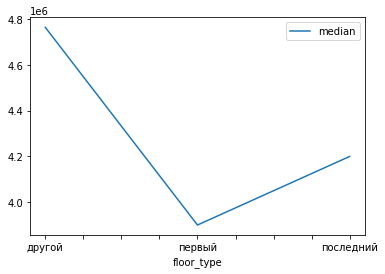

In [48]:
pivot_total_floor_type = df.pivot_table(index='floor_type',values='last_price',aggfunc = ['mean','count','median'])
pivot_total_floor_type.columns = ['mean','count','median']
pivot_total_floor_type.plot(y='median')
pivot_total_floor_type


Стоимость квартиры напрямую зависит от этажа, на котором она находится.  
Квартиры на первом этаже дешевле.  
На последнем этаже квартира стоит чуть дороже, чем на первом.

<AxesSubplot:xlabel='day_publish'>

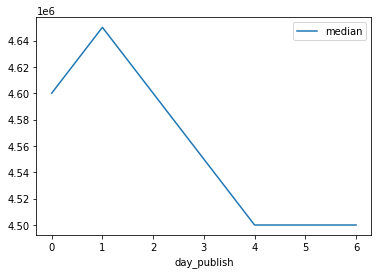

In [49]:
pivot_total_day = df.pivot_table(index='day_publish',values='last_price',aggfunc = ['mean','median'])
pivot_total_day.columns = ['mean','median']
pivot_total_day.plot(y='median')



Рост цен наблюдается в первой половине недели с их максимальным показателем во вторник.  
Вторая половина недели характеризуется сниженными ценами,что предположительно может быть обусловленно попыткой спровоцировать покупателя проявить больший интерес к недвижимости на сайте.


<AxesSubplot:xlabel='month_publish'>

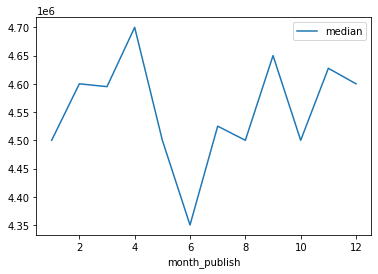

In [50]:
pivot_total_month = df.pivot_table(index='month_publish',values='last_price',aggfunc = ['mean','median'])
pivot_total_month.columns = ['mean','median']
pivot_total_month.plot(y='median')



Согласно полученным данным динамике стоимости квартир по месяцам, максимальная стоимость квартир приходится на конец марта-начало апреля.  
Далее наблюдается резкий спад до минимальных показателей в июне.  
Начиная с августа ценновые показатели выравниваются,варьируясь в промежутке от 4.50 до 4.60 млн.рублей, вплоть до февраля.

<AxesSubplot:xlabel='year_publish'>

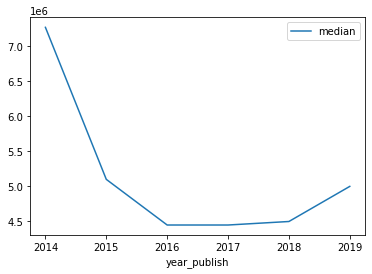

In [51]:
pivot_total_year = df.pivot_table(index='year_publish',values='last_price',aggfunc = ['mean','count','median'])
pivot_total_year.columns = ['mean','count','median']
pivot_total_year.plot(y='median')



<AxesSubplot:xlabel='year_publish'>

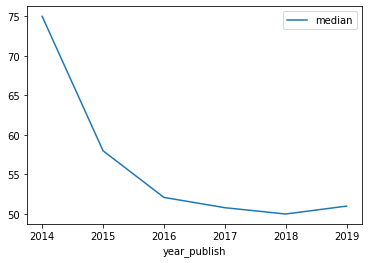

In [52]:
pivot_total_year = df.pivot_table(index='year_publish',values='total_area',aggfunc = ['mean','count','median'])
pivot_total_year.columns = ['mean','count','median']
pivot_total_year.plot(y='median')

В годовом срезе наблюдается корреляция между уменьшением площади продаваемых квартир и спадом цен, начиная с 2014г. Вследствии этого за три года произошло резкое падение стоимости квартир на 2 млн.рублей(с 6.5 до 4.5).
Стоимость квартир с 2018г начала расти,хотя площадь выросла незначительно.

**Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

In [53]:
loca_pivot = df.pivot_table(index='locality_name',values='cost_per_metr',aggfunc=['count','mean'])
loca_pivot.columns = ['count','mean']
loca_pivot = loca_pivot.sort_values('count', ascending = False).head(10)
display(loca_pivot)
display(loca_pivot[loca_pivot['mean']==loca_pivot['mean'].max()])
loca_pivot[loca_pivot['mean']==loca_pivot['mean'].min()]

,count,mean
locality_name,,
Санкт-Петербург,14899,110196.095690
Мурино,583,86017.744202
Кудрово,469,95310.442814
поселок Шушары,437,78554.422449
Всеволожск,396,68552.143131
Пушкин,350,102719.291086
Колпино,331,75172.568218
поселок Парголово,327,90175.913089
Гатчина,305,68811.372590


,count,mean
locality_name,,
Санкт-Петербург,14899,110196.09569


,count,mean
locality_name,,
Выборг,231,58095.714545


Самая высокая стоимость в Санкт-Петербурге  
Самая низкая стоимость в Выборге

**Средняя стоимость кв. в Санкт-Петербурге**

,cost_per_metr
city_center_km,
0.0,122188.950909
1.0,141933.365674
2.0,125845.067523
3.0,116118.485544
4.0,124694.168322
5.0,132612.661553
6.0,132545.982808
7.0,132912.834626
8.0,123181.042359


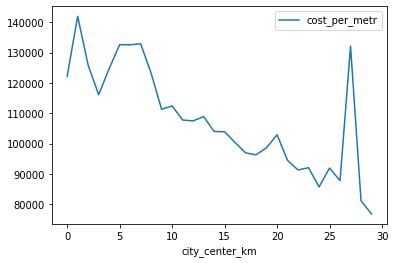

In [54]:
spb_df = df[df['locality_name'] == 'Санкт-Петербург']
spb_df_pi = spb_df.pivot_table(index='city_center_km',values='cost_per_metr',aggfunc='mean')
spb_df_pi.plot()
spb_df_pi



Стоимость недвижимости напрямую зависит от удаленности от центра города: с каждым 5км., удаленным от центра города, цена за кв.м квартиры снижается.

### Напишите общий вывод

1. **Предобработка данных**:
   - Обнаружены и обработаны пропущенные значения. 
   - Уникальные значения в названиях населенных пунктов приведены к единому виду, устранены неявные дубликаты.
   
 **Причины пропусков в данных:**
   - Недостаточная внимательность или неполное заполнение информации продавцами.
   - Технические ошибки при сборе данных.
   - Отсутствие некоторых характеристик у объектов недвижимости.

 **Обработка аномалий:**
   - Выявлены и исправлены аномалии в данных
   - Удалены редкие и выбивающиеся значения  
   

2. **Добавление новых столбцов**:
   - Вычислены и добавлены новые параметры: цена квадратного метра, день недели, месяц и год публикации, тип этажа квартиры, расстояние до центра города в километрах.    


3. **Исследовательский анализ данных**:
   - Построены гистограммы для анализа параметров: общей площади, жилой площади, площади кухни, цены объекта, количества комнат, высоты потолков, типа этажа, общего количества этажей в доме, расстояния до центра города и ближайшего парка.
   - Проанализировано время продажи квартир. Построена гистограмма, вычислены среднее и медианное время продажи. Выделены быстрые и долгие продажи: **44 и 225** дней соответственно.
   - Определены основные факторы, влияющие на стоимость объекта: общая площадь, жилая площадь, площадь кухни, количество комнат, этаж, дата размещения объявления. Построены соответствующие графики.


4. **Анализ стоимости квадратного метра**:
   - Подсчитана средняя цена квадратного метра в 10 населенных пунктах с наибольшим числом объявлений. Определены населенные пункты с самой высокой (*Санкт-Петербург*) и низкой (*Выборг*) стоимостью квадратного метра.
   - В Санкт-Петербурге исследована зависимость стоимости квартир от расстояния до центра города. Построен график изменения средней цены для каждого километра от центра.

 